# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
#Dependancies
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd
import requests as req
import json
from api_keys import api_key as apikey
import time

## Generate Cities List

In [36]:

#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [38]:
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [44]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [45]:
samplecity

,city,country
4887,alcamo,it
2452,phun phin,th
2304,remedios,pa
1640,bone,id
7546,volchansk,ru
4450,tral,in
368,sombrio,br
1030,falaleu,wf
2933,assomada,cv
5896,partyzany,ua


In [48]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"City not found. Skipping: {row['city']}")
    print(f"Processing Record#: {count}")
    print(f"City: {row['city']}" )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\s

Processing Record#: 1
City: alcamo
City not found. Skipping: phun phin
Processing Record#: 2
City: phun phin
Processing Record#: 3
City: remedios
Processing Record#: 4
City: bone
Processing Record#: 5
City: volchansk
Processing Record#: 6
City: tral
Processing Record#: 7
City: sombrio
City not found. Skipping: falaleu
Processing Record#: 8
City: falaleu
Processing Record#: 9
City: assomada
Processing Record#: 10
City: partyzany
Processing Record#: 11
City: rockland
Processing Record#: 12
City: jimma
Processing Record#: 13
City: francisco beltrao
Processing Record#: 14
City: bjornevatn
Processing Record#: 15
City: manchar
Processing Record#: 16
City: semnan
Processing Record#: 17
City: pontal
City not found. Skipping: andenes
Processing Record#: 18
City: andenes
City not found. Skipping: sakakah
Processing Record#: 19
City: sakakah
Processing Record#: 20
City: cabadiangan
Processing Record#: 21
City: carutapera
Processing Record#: 22
City: kaeo
Processing Record#: 23
City: sassandra
Pro

Processing Record#: 198
City: porirua
Processing Record#: 199
City: damghan
Processing Record#: 200
City: kuopio
Processing Record#: 201
City: monteiro
Processing Record#: 202
City: dinghai
Processing Record#: 203
City: cotui
Processing Record#: 204
City: grand bank
Processing Record#: 205
City: port-cartier
Processing Record#: 206
City: khasan
Processing Record#: 207
City: wichelen
Processing Record#: 208
City: los alamos
Processing Record#: 209
City: hami
City not found. Skipping: chissamba
Processing Record#: 210
City: chissamba
Processing Record#: 211
City: bariri
Processing Record#: 212
City: gulu
Processing Record#: 213
City: livramento
Processing Record#: 214
City: oloron-sainte-marie
Processing Record#: 215
City: kita
Processing Record#: 216
City: ormstown
Processing Record#: 217
City: laredo
Processing Record#: 218
City: katangli
Processing Record#: 219
City: kingaroy
Processing Record#: 220
City: williamsport
Processing Record#: 221
City: jawa
Processing Record#: 222
City: ns

Processing Record#: 392
City: dhankuta
Processing Record#: 393
City: tarata
Processing Record#: 394
City: bulawayo
Processing Record#: 395
City: morros
Processing Record#: 396
City: martigny
Processing Record#: 397
City: little current
Processing Record#: 398
City: marshall
Processing Record#: 399
City: takaka
Processing Record#: 400
City: grenada
Processing Record#: 401
City: horqueta
Processing Record#: 402
City: chiang klang
Processing Record#: 403
City: lydenburg
Processing Record#: 404
City: jatiroto
Processing Record#: 405
City: corinto
Processing Record#: 406
City: riviere-au-renard
Processing Record#: 407
City: palanga
Processing Record#: 408
City: gallipoli
Processing Record#: 409
City: balakhta
Processing Record#: 410
City: truro
Processing Record#: 411
City: vanderhoof
Processing Record#: 412
City: kolda
Processing Record#: 413
City: maturin
Processing Record#: 414
City: lethbridge
Processing Record#: 415
City: katy
Processing Record#: 416
City: varias
Processing Record#: 41

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
#remove blank answers
samplecity = samplecity[samplecity.latitude != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
4887,alcamo,it,37,37,56,82,40,12
2304,remedios,pa,22,22,82,51,20,8
1640,bone,id,-10,-10,80,99,12,7
7546,volchansk,ru,59,59,17,75,88,8
4450,tral,in,33,33,28,95,92,1
368,sombrio,br,-29,-29,83,68,0,2
2933,assomada,cv,15,15,80,47,0,23
5896,partyzany,ua,45,45,34,100,32,16
5471,rockland,us,42,42,32,86,90,16
2271,jimma,et,7,7,58,91,56,2


In [55]:
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.count()

city           453
country        453
latitude       453
longitude      453
temperature    453
humidity       453
cloudiness     453
wind_speed     453
dtype: int64

In [56]:
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,alcamo,it,37,37,56,82,40,12
1,remedios,pa,22,22,82,51,20,8
2,bone,id,-10,-10,80,99,12,7
3,volchansk,ru,59,59,17,75,88,8
4,tral,in,33,33,28,95,92,1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

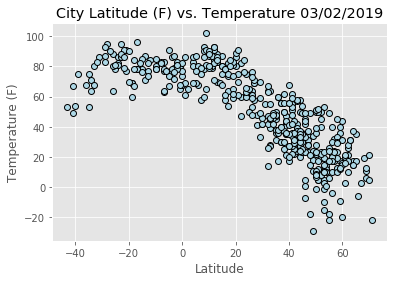

In [82]:
# date = datetime.date.today()
date = time.strftime("%m/%d/%Y")
plt.scatter(samplecity['latitude'],samplecity['temperature'], c = 'lightblue', edgecolor="black", linewidths=1, marker="o")
plt.title(f"City Latitude (F) vs. Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

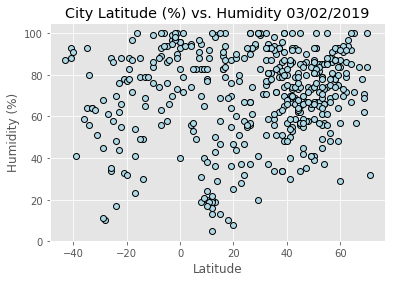

In [77]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'], c = 'lightblue', edgecolor="black", linewidths=1, marker="o")
plt.title(f"City Latitude (%) vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

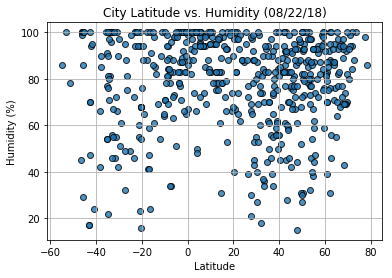

#### Latitude vs. Cloudiness Plot

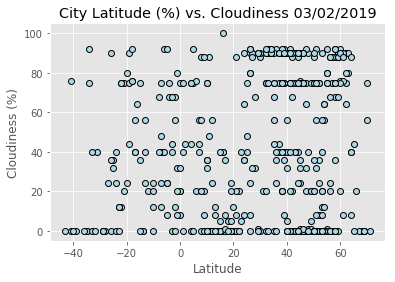

In [78]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloudiness'], c = 'lightblue', edgecolor="black", linewidths=1, marker="o")
plt.title(f"City Latitude (%) vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

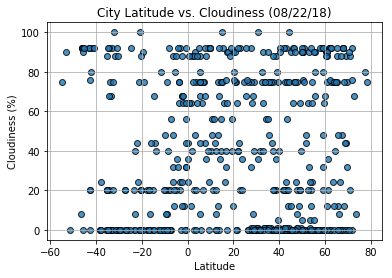

#### Latitude vs. Wind Speed Plot

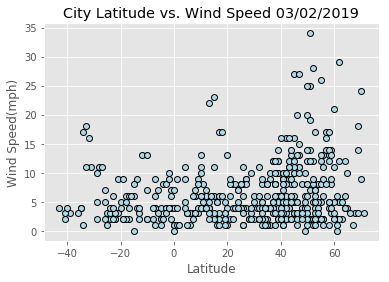

In [79]:
# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind_speed'], c = 'lightblue', edgecolor="black", linewidths=1, marker="o")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

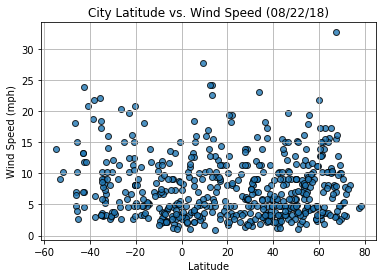